# LGMVIP - Data Science - November 2021

#### Task - 2 ( Stock Market Prediction And Forecasting Using Stacked LSTM )
#### Author - Sarangh Ramesh KV

###### Data set used in this project : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

## 

## 1. Importing libraries

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## 2. Reading Data From Dataset

In [9]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')#reading the dataset using pandas
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


## 3. Data Exploration & Data Visualization

In [10]:
df.info() #Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [11]:
df.describe#Description of the dataset

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4              

In [12]:
df.isnull() #Checking for any null values in the dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()#Checking for the number of null values in the dataset

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [14]:
df.shape #(number of rows, number of columns)

(2035, 8)

<AxesSubplot:>

<Figure size 1728x576 with 0 Axes>

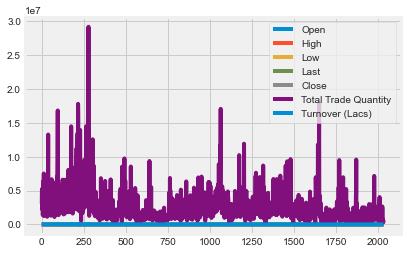

In [15]:
plt.figure(figsize=(24,8))
df.plot()

## Converting 'DATE' from object to datetime Dtype

In [16]:
df['Date']= pd.to_datetime(df['Date'],format = "%Y-%m-%d")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


<AxesSubplot:xlabel='Turnover (Lacs)', ylabel='Date'>

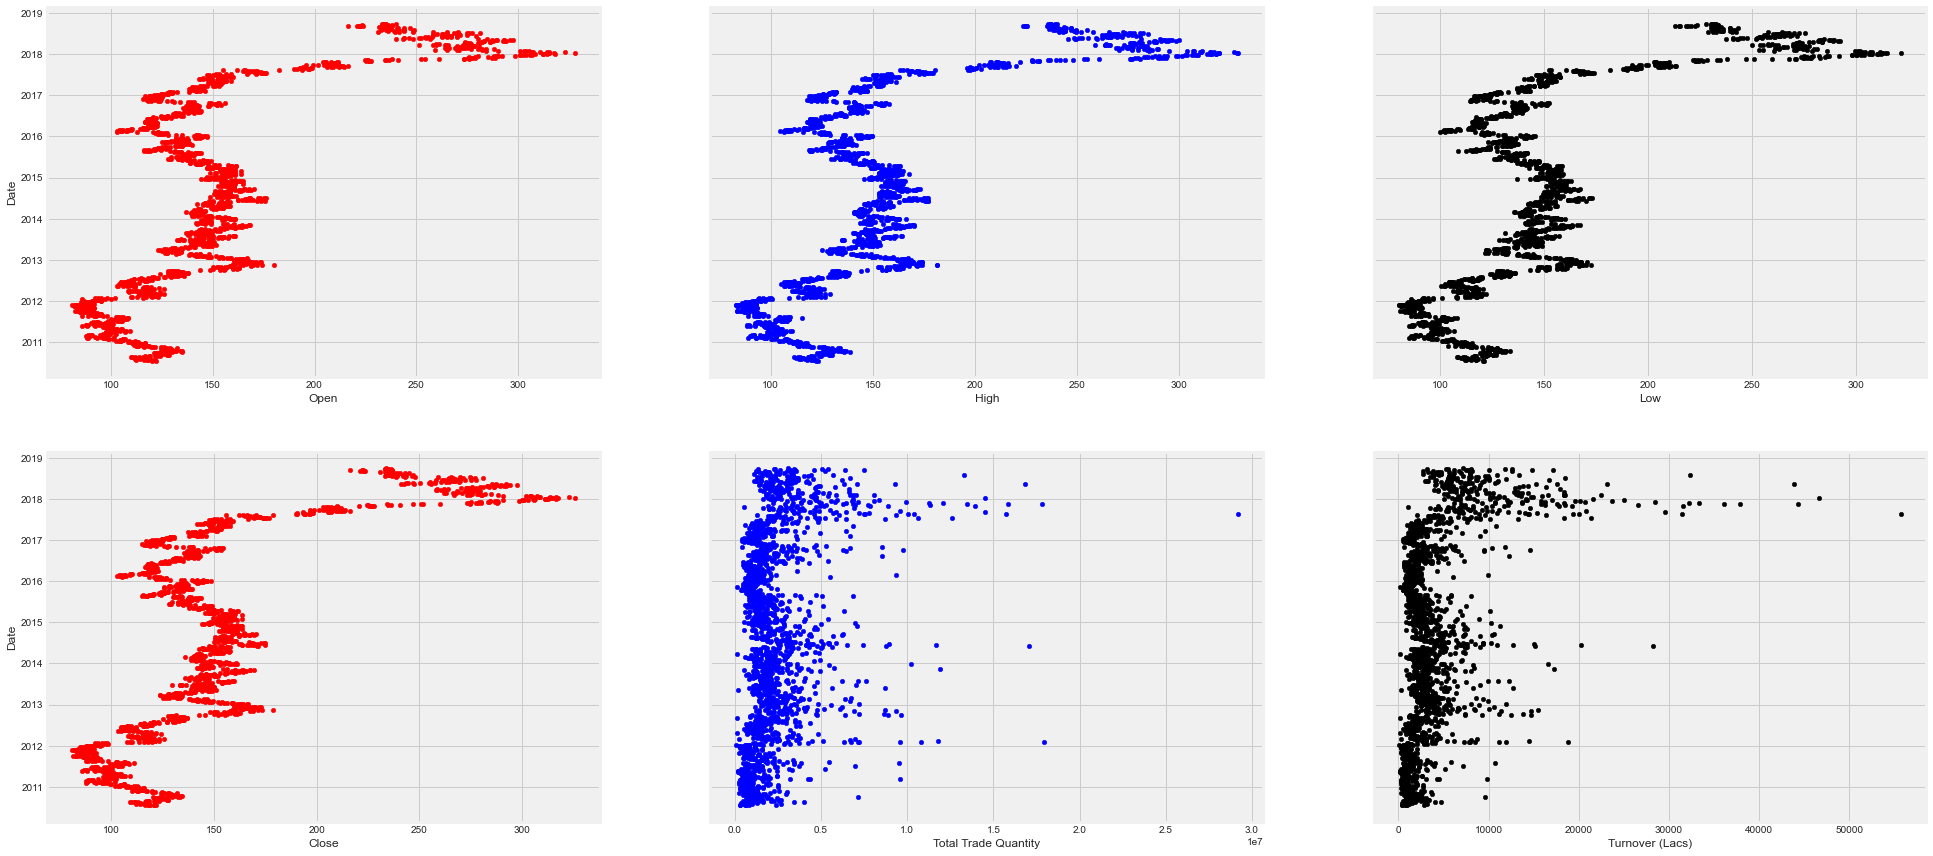

In [18]:
#plotting the scatterplot of all the features with respect to date
fig,axs=plt.subplots(2,3,sharey=True)
df.plot(kind='scatter', x='Open', y='Date', ax=axs[0,0], figsize=(30, 15), color='red')
df.plot(kind='scatter', x='High', y='Date', ax=axs[0,1], color='blue')
df.plot(kind='scatter', x='Low', y='Date', ax=axs[0,2], color='black')
df.plot(kind='scatter', x='Close', y='Date', ax=axs[1,0], color='red')
df.plot(kind='scatter', x='Total Trade Quantity', y='Date', ax=axs[1,1], color='blue')
df.plot(kind='scatter', x='Turnover (Lacs)', y='Date', ax=axs[1,2], color='black')

## Insights from the above plots:-
- OPEN, HIGH, LOW, CLOSE and Total Trade Quantity features are showing similar relationship/trend with respect to time.
- The 'Turnover (Lacs)' feature is mostly distributed between the values 0.0 to 100000, few outliers are observed.

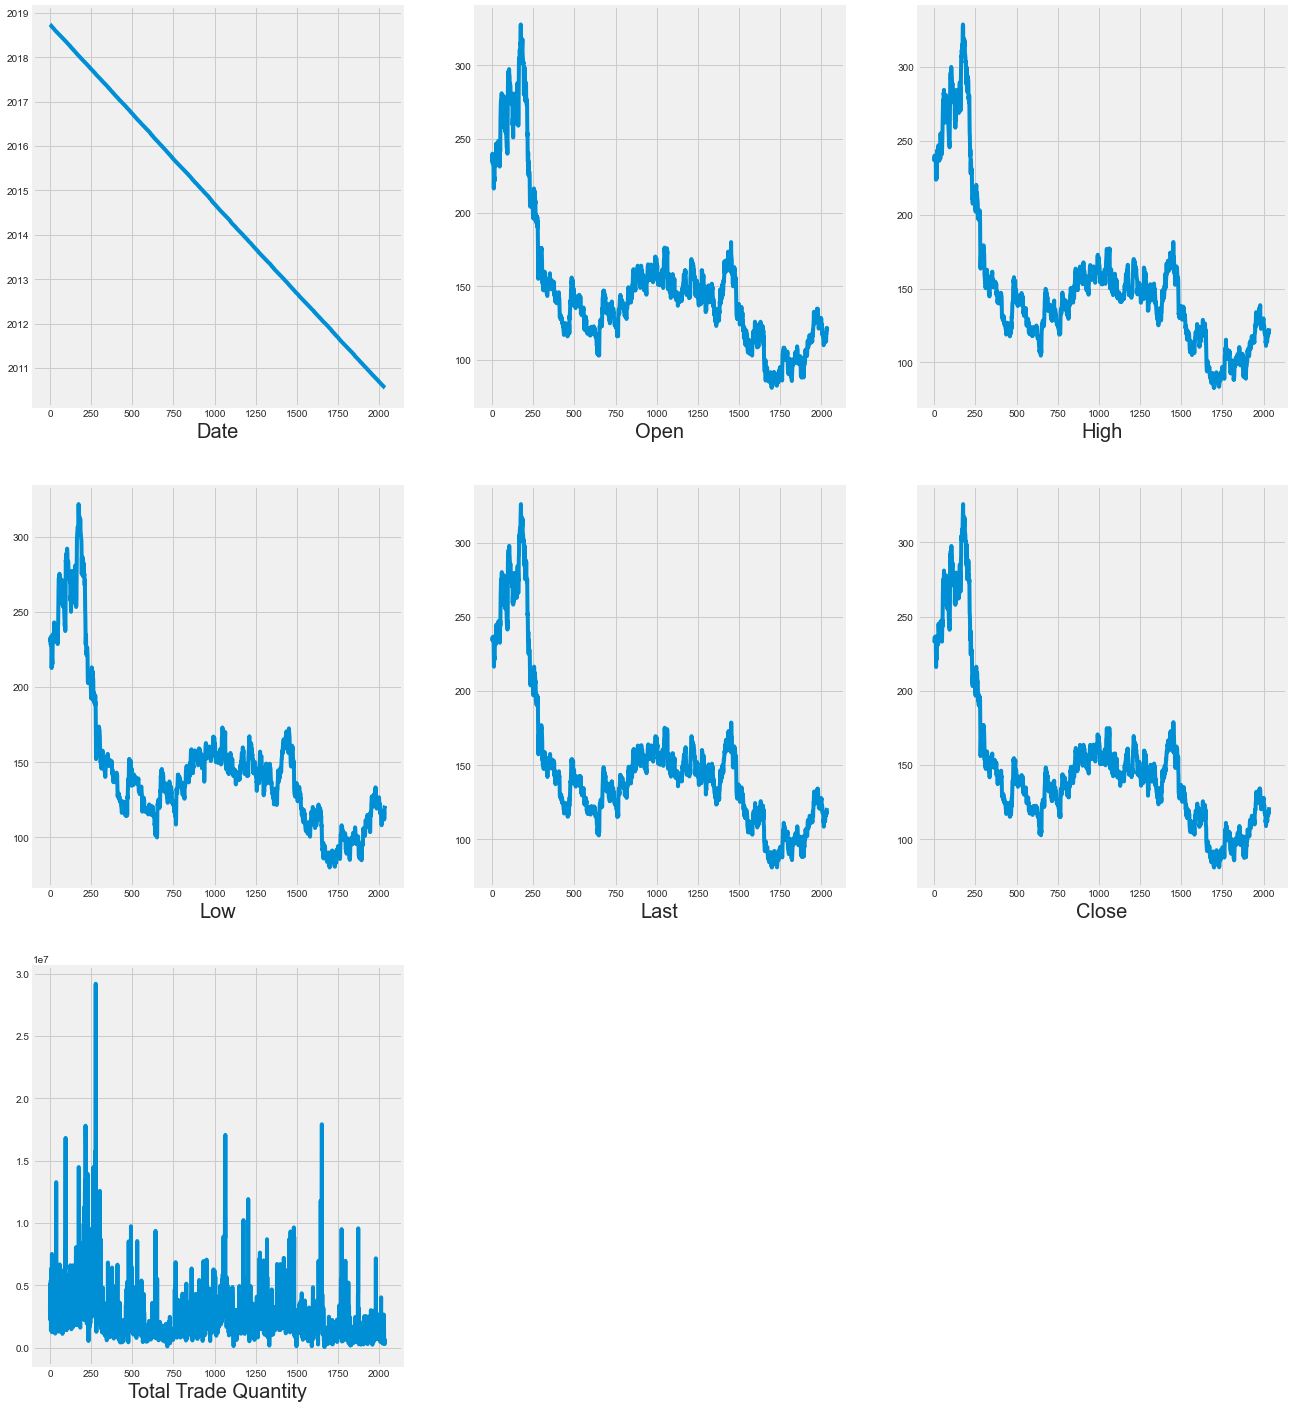

In [19]:
#plotting the feature values 
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        plt.plot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [20]:
df=df.set_index('Date') #Setting the Date feature as an index

In [21]:
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


C:\Users\rsara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rsara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rsara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

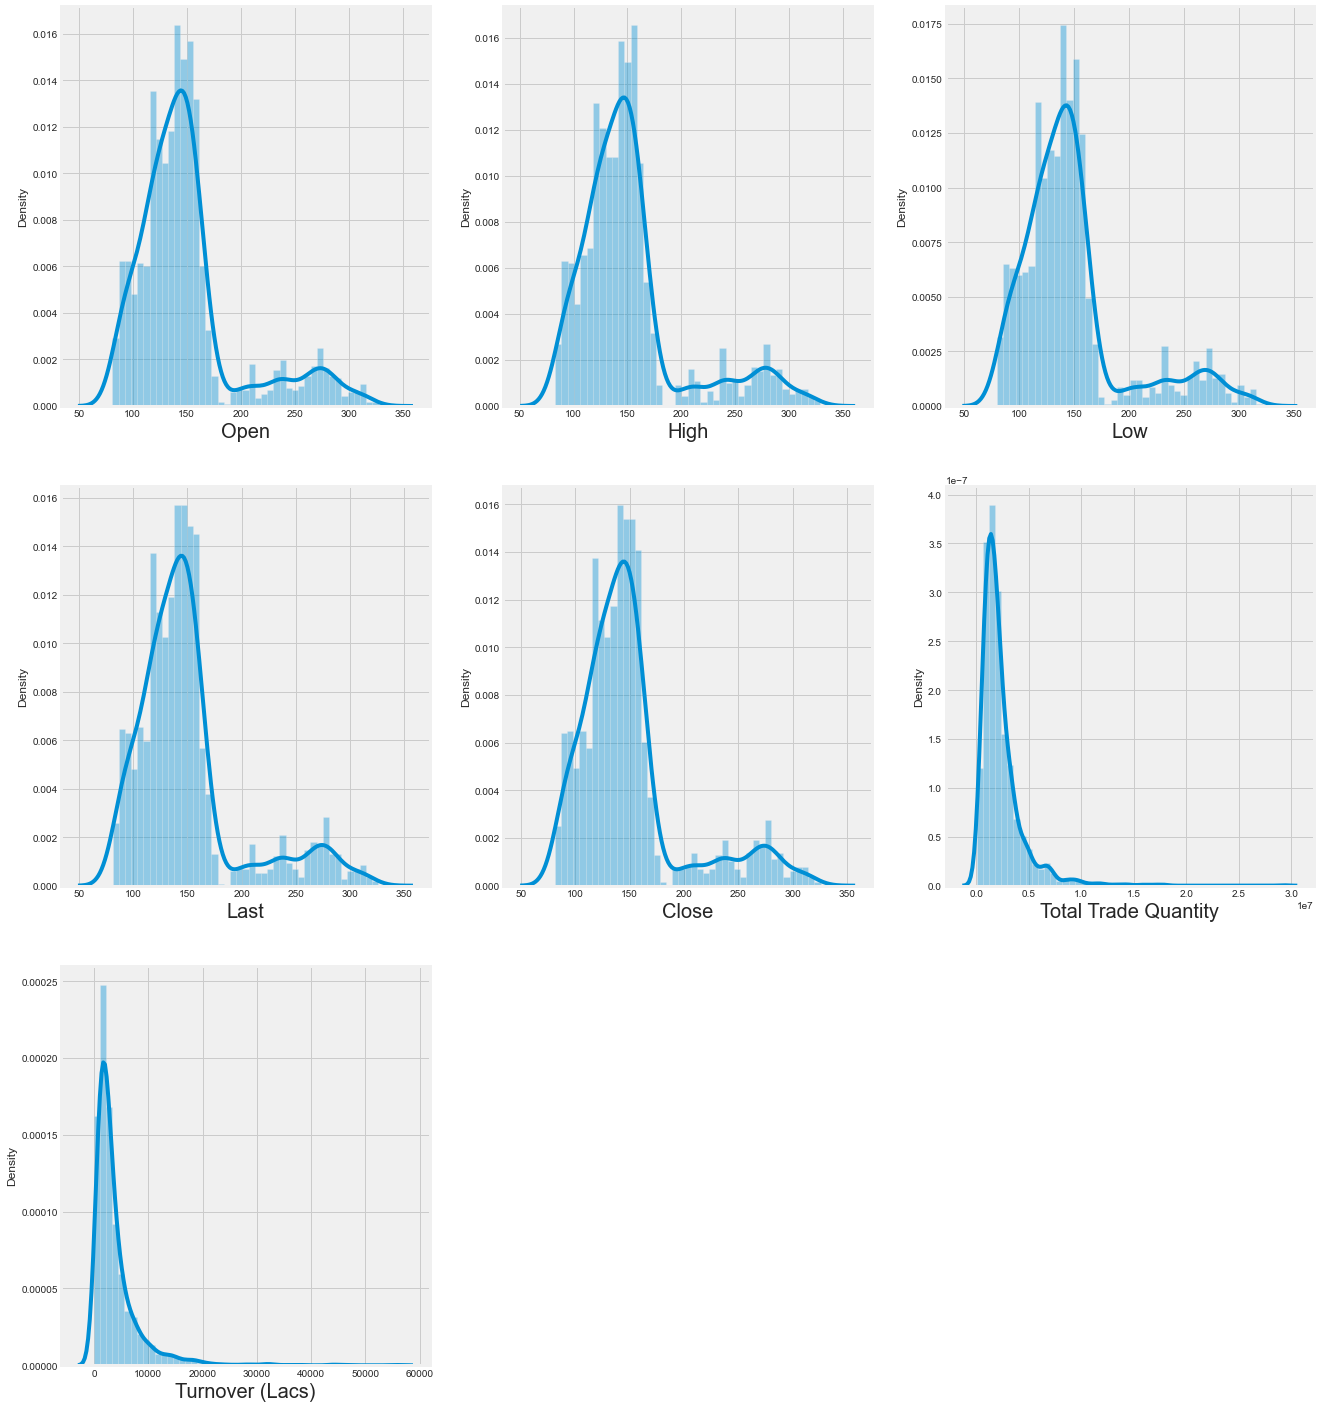

In [22]:
#Plotting the distribution plots for all the features
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

### Findings from the plot above:
- The maximum density of volume features is about 1.7. The density is 0.0, which is almost constant, and  after 0.2, it becomes 0. The data is mostly  between 0.0 and 0.2. distribution
- For the first 5 features, the density indicates a drop after point 100 on the X-axis, as shown in the figures above.
- A statistical data set's (or population's) distribution is a list or function that shows all of the data's possible values (or intervals) and how often they occur. When categorical data is structured, the number or percentage of individuals in each group can be shown.

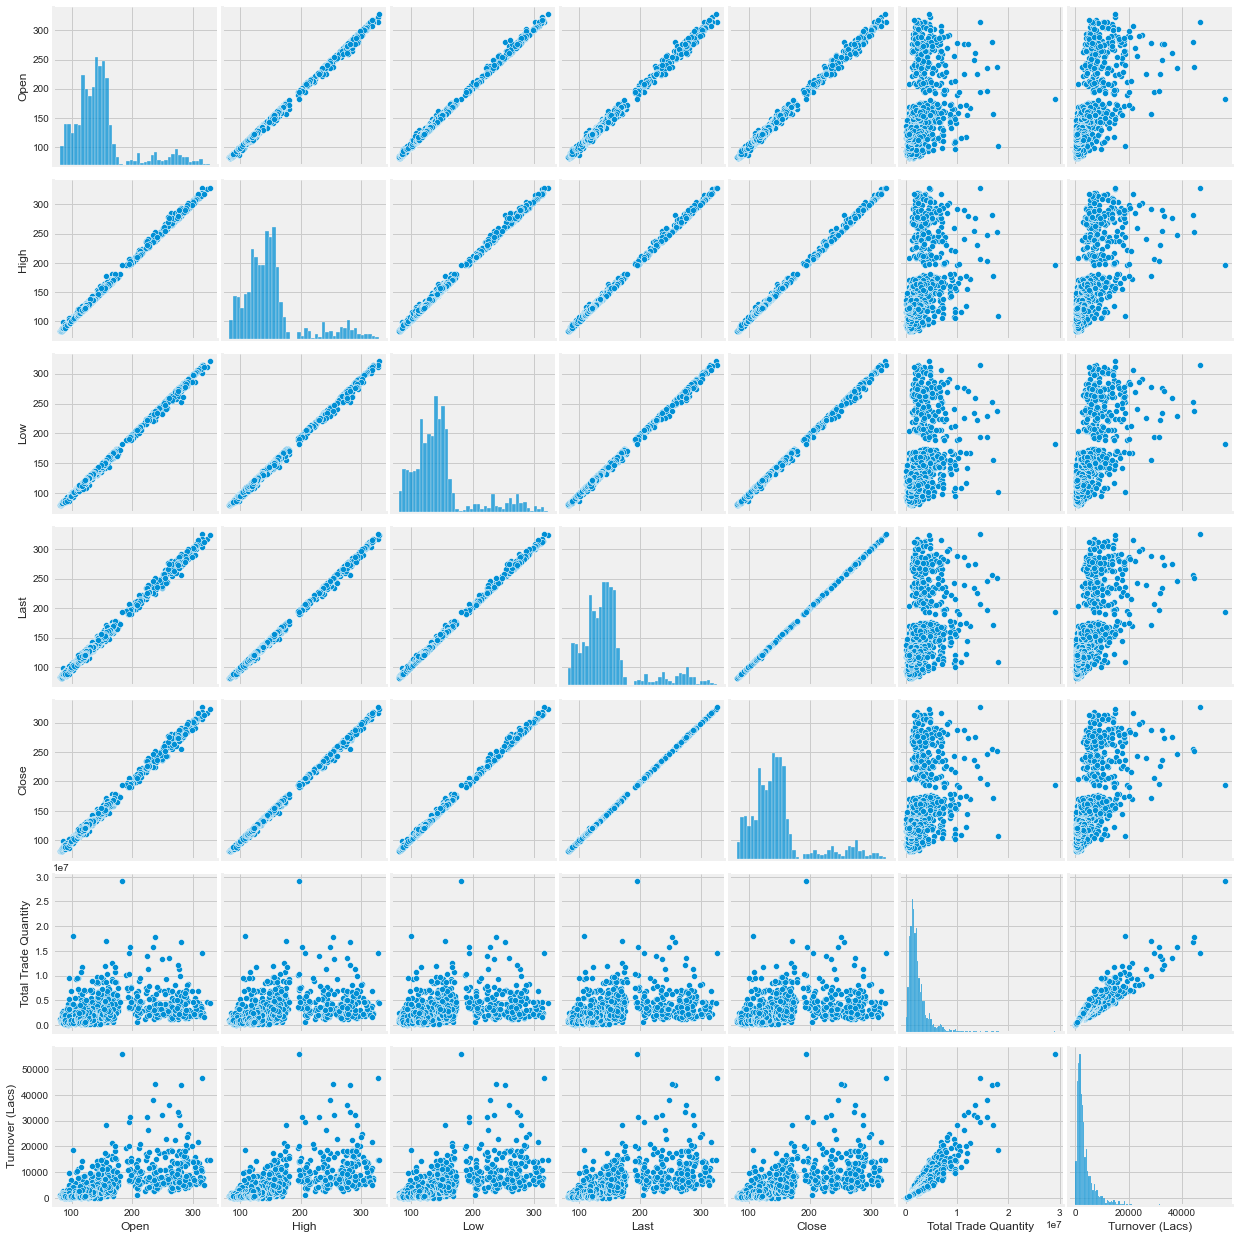

In [23]:
sns.pairplot(data=df) # relation between each and every variable present in Pandas DataFrame.

<AxesSubplot:>

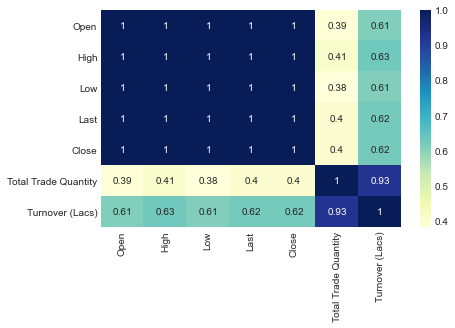

In [24]:
sns.heatmap(df.corr(),annot=True,cmap = "YlGnBu") #Graphical representation of data using colors to visualize the value of the matrix.

### Findings from the plot above:
- For each value to be plotted, a heatmap has values indicating several shades of the same colour. The darker hues of the chart usually correspond to higher values than the lighter shades. A completely different colour can likewise be utilised for a significantly different value.


In [25]:
df=df.reset_index()

In [26]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


<AxesSubplot:>

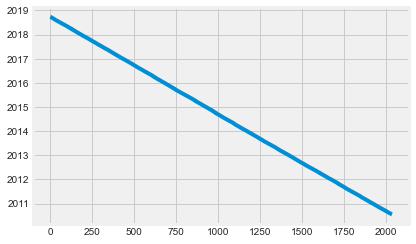

In [27]:
df['Date'].plot()

In [28]:
training_set = df.iloc[:,1:2].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

### SCALLING OF DATASET

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

data_training_scaled = scaler.fit_transform(training_set)

In [30]:
features_set = []
labels = []
for i in range(60, 586):
    features_set.append(data_training_scaled[i-60:i, 0])
    labels.append(data_training_scaled[i, 0])

In [31]:
features_set, labels = np.array(features_set), np.array(labels)

In [32]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape

(526, 60, 1)

### BUILDING THE LSTM

In [33]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [34]:
model = Sequential()

In [35]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [36]:
model.fit(features_set, labels, epochs = 50, batch_size = 20)

Epoch 1/50
27/27 [==============================] - 0s 691us/step - loss: 0.0118
Epoch 2/50
27/27 [==============================] - 0s 729us/step - loss: 0.0118
Epoch 3/50
27/27 [==============================] - 0s 959us/step - loss: 0.0118
Epoch 4/50
27/27 [==============================] - 0s 997us/step - loss: 0.0118
Epoch 5/50
27/27 [==============================] - 0s 767us/step - loss: 0.0118
Epoch 6/50
27/27 [==============================] - 0s 921us/step - loss: 0.0118
Epoch 7/50
27/27 [==============================] - 0s 729us/step - loss: 0.0118
Epoch 8/50
27/27 [==============================] - 0s 690us/step - loss: 0.0118
Epoch 9/50
27/27 [==============================] - 0s 690us/step - loss: 0.0118
Epoch 10/50
27/27 [==============================] - 0s 844us/step - loss: 0.0118
Epoch 11/50
27/27 [==============================] - 0s 844us/step - loss: 0.0118
Epoch 12/50
27/27 [==============================] - 0s 844us/step - loss: 0.0118
Epoch 13/50
27/27 [======

In [37]:
data_testing_complete = pd.read_csv('NSE-TATAGLOBAL.csv')
data_testing_processed = data_testing_complete.iloc[:, 1:2]
data_testing_processed

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


### PREDICTION OF THE DATA

In [41]:
data_total = pd.concat((df['Open'], df['Open']), axis=0)

In [42]:
test_inputs = data_total[len(data_total) - len(df) - 60:].values
test_inputs.shape

(2095,)

In [43]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [44]:
test_features = []
for i in range(60, 89):
    test_features.append(test_inputs[i-60:i, 0])

In [45]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
test_features.shape

(29, 60, 1)

In [46]:
predictions = model.predict(test_features)

In [47]:
predictions

array([[[0.20600162],
        [0.21654502],
        [0.21654502],
        ...,
        [0.1650446 ],
        [0.15896188],
        [0.16626115]],

       [[0.21654502],
        [0.21654502],
        [0.2175588 ],
        ...,
        [0.15896188],
        [0.16626115],
        [0.6202352 ]],

       [[0.21654502],
        [0.2175588 ],
        [0.19870235],
        ...,
        [0.16626115],
        [0.6202352 ],
        [0.6222628 ]],

       ...,

       [[0.17092457],
        [0.16788322],
        [0.17477697],
        ...,
        [0.62206   ],
        [0.6455799 ],
        [0.67234385]],

       [[0.16788322],
        [0.17477697],
        [0.16443634],
        ...,
        [0.6455799 ],
        [0.67234385],
        [0.6605839 ]],

       [[0.17477697],
        [0.16443634],
        [0.14557989],
        ...,
        [0.67234385],
        [0.6605839 ],
        [0.64760745]]], dtype=float32)

In [49]:
x_train = df[0:1256]
y_train = df[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 8)
(1256, 8)


In [50]:
x_train

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
1251,2013-09-04,142.00,145.35,140.65,143.60,143.85,1006267,1446.89
1252,2013-09-03,144.10,145.20,140.70,141.80,141.55,1615075,2313.84
1253,2013-09-02,139.40,144.40,139.35,144.00,143.80,1184597,1692.05
1254,2013-08-30,138.10,140.65,136.70,139.20,139.00,1088398,1510.77


In [51]:
np.random.seed(1)
np.random.randn(3, 3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

In [52]:
np.random.normal(1)

0.7506296245225899

In [53]:
np.random.seed(42)
np.random.normal(size = 1000, scale = 100).std()

97.87262077473541

### Visualizing Result

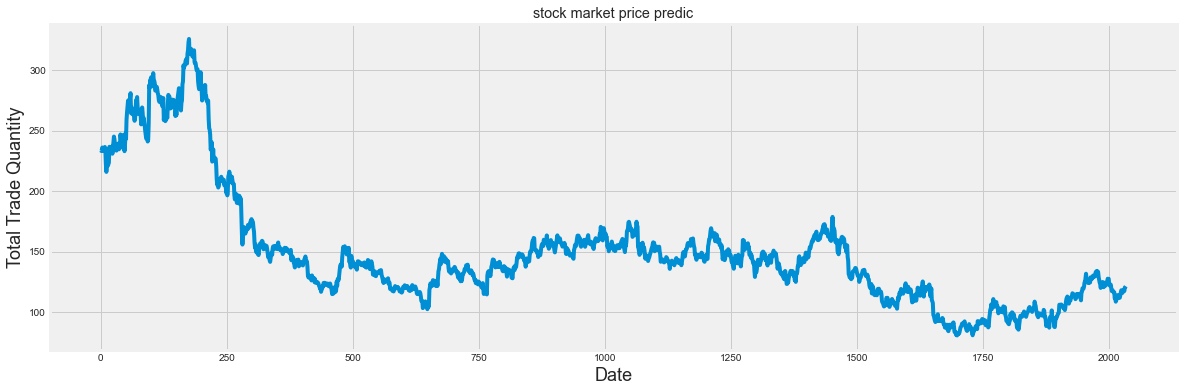

In [57]:
plt.figure(figsize=(18,6))
plt.title("stock market price predic")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

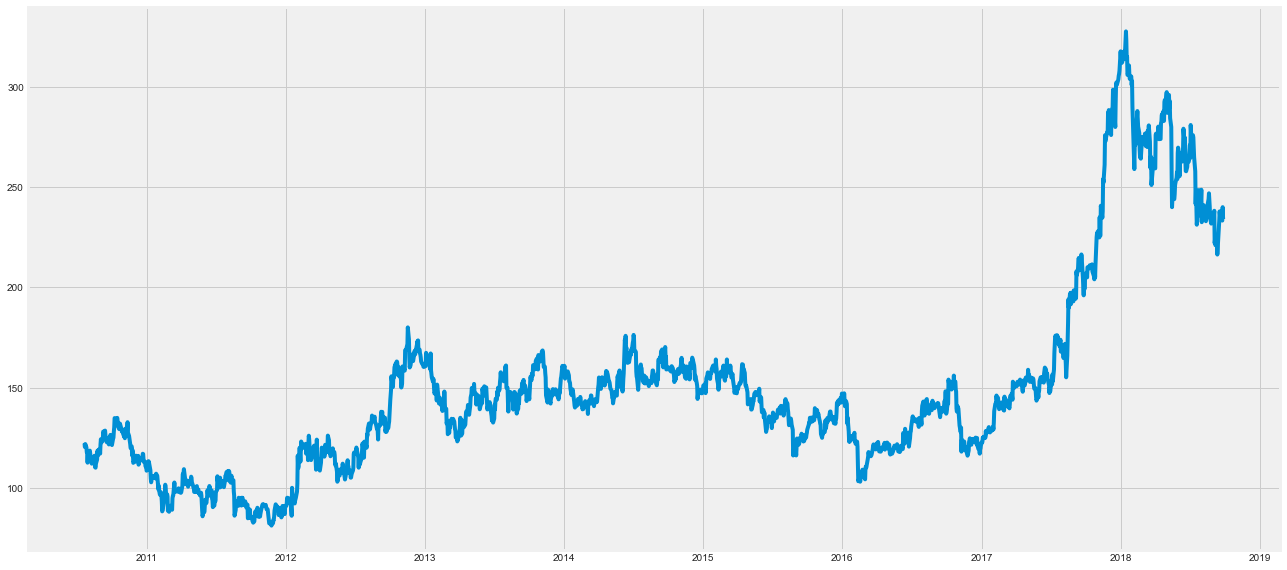

In [64]:
#Analyze the closing prices from dataframe:
df["Date"]=pd.to_datetime(df.Date)
df.index=df['Date']
#data_set.head()

plt.figure(figsize=(20,10))
plt.plot(df["Open"],label='ClosePriceHist')

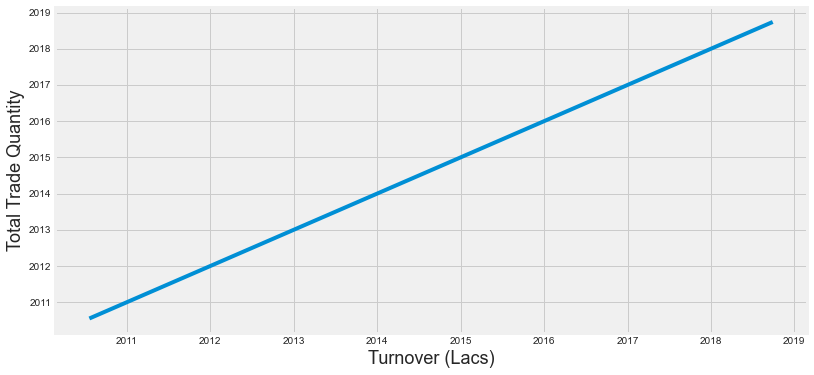

In [66]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'])
plt.xlabel('Turnover (Lacs)',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

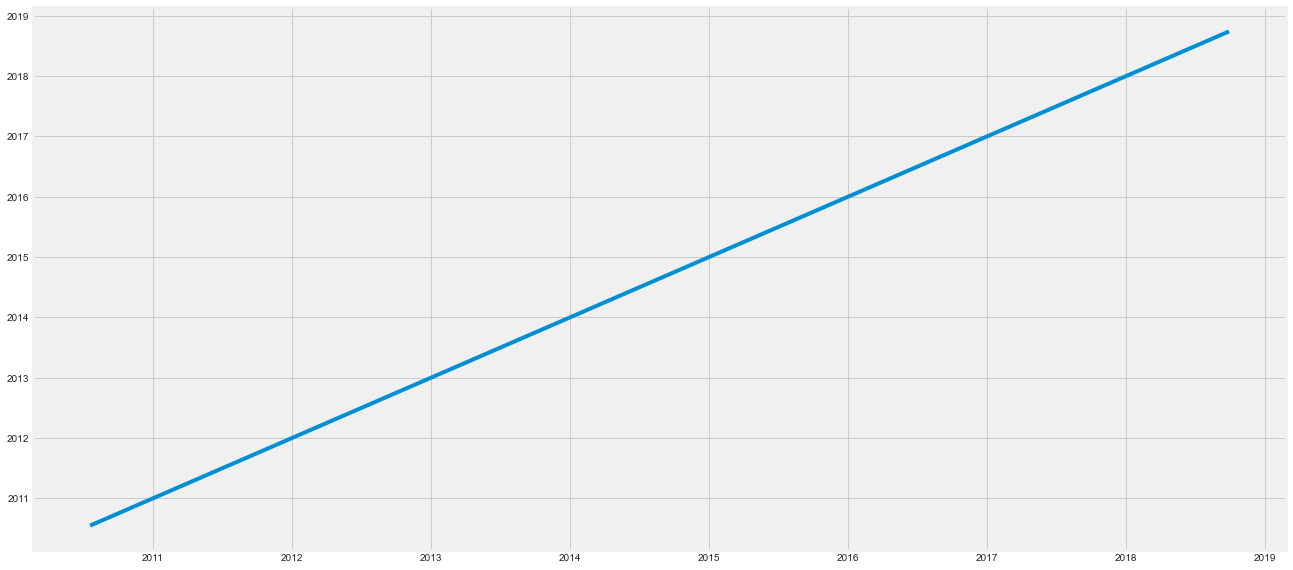

In [67]:
#Analyze the closing prices from dataframe:
df["Turnover (Lacs)"]=pd.to_datetime(df.Date)
df.index=df['Turnover (Lacs)']
#data_set.head()

plt.figure(figsize=(20,10))
plt.plot(df["Turnover (Lacs)"],label='ClosePriceHist')